# Import Libraries/Datasets


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
os.listdir('./train')

['mild', 'moderate', 'no_dr', 'proliferate_dr', 'severe']

In [3]:
os.listdir(os.path.join('train', 'Mild'))

['1020_left.jpeg',
 '1020_right.jpeg',
 '1027_left.jpeg',
 '1036_left.jpeg',
 '1036_right.jpeg',
 '1043_left.jpeg',
 '1077_left.jpeg',
 '1077_right.jpeg',
 '1098_left.jpeg',
 '1100_left.jpeg',
 '1100_right.jpeg',
 '1139_left.jpeg',
 '1145_left.jpeg',
 '114_left.jpeg',
 '114_right.jpeg',
 '1226_left.jpeg',
 '1266_left.jpeg',
 '1266_right.jpeg',
 '1277_left.jpeg',
 '1283_left.jpeg',
 '1309_left.jpeg',
 '1343_left.jpeg',
 '1343_right.jpeg',
 '15_left.jpeg',
 '178_left.jpeg',
 '178_right.jpeg',
 '17_right.jpeg',
 '8430_left.jpeg',
 '8493_left.jpeg',
 '8513_left.jpeg',
 '8513_right.jpeg',
 '8553_left.jpeg',
 '8620_right.jpeg',
 '8623_left.jpeg',
 '8623_right.jpeg',
 '8637_left.jpeg',
 '8637_right.jpeg',
 '8660_left.jpeg']

In [4]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  for j in train_class:
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 169 



In [5]:
train

['train\\mild\\1020_left.jpeg',
 'train\\mild\\1020_right.jpeg',
 'train\\mild\\1027_left.jpeg',
 'train\\mild\\1036_left.jpeg',
 'train\\mild\\1036_right.jpeg',
 'train\\mild\\1043_left.jpeg',
 'train\\mild\\1077_left.jpeg',
 'train\\mild\\1077_right.jpeg',
 'train\\mild\\1098_left.jpeg',
 'train\\mild\\1100_left.jpeg',
 'train\\mild\\1100_right.jpeg',
 'train\\mild\\1139_left.jpeg',
 'train\\mild\\1145_left.jpeg',
 'train\\mild\\114_left.jpeg',
 'train\\mild\\114_right.jpeg',
 'train\\mild\\1226_left.jpeg',
 'train\\mild\\1266_left.jpeg',
 'train\\mild\\1266_right.jpeg',
 'train\\mild\\1277_left.jpeg',
 'train\\mild\\1283_left.jpeg',
 'train\\mild\\1309_left.jpeg',
 'train\\mild\\1343_left.jpeg',
 'train\\mild\\1343_right.jpeg',
 'train\\mild\\15_left.jpeg',
 'train\\mild\\178_left.jpeg',
 'train\\mild\\178_right.jpeg',
 'train\\mild\\17_right.jpeg',
 'train\\mild\\8430_left.jpeg',
 'train\\mild\\8493_left.jpeg',
 'train\\mild\\8513_left.jpeg',
 'train\\mild\\8513_right.jpeg',
 'trai

In [6]:
label

['mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 'no_dr',
 '

# PERFORM DATA EXPLORATION AND DATA VISUALIZATION



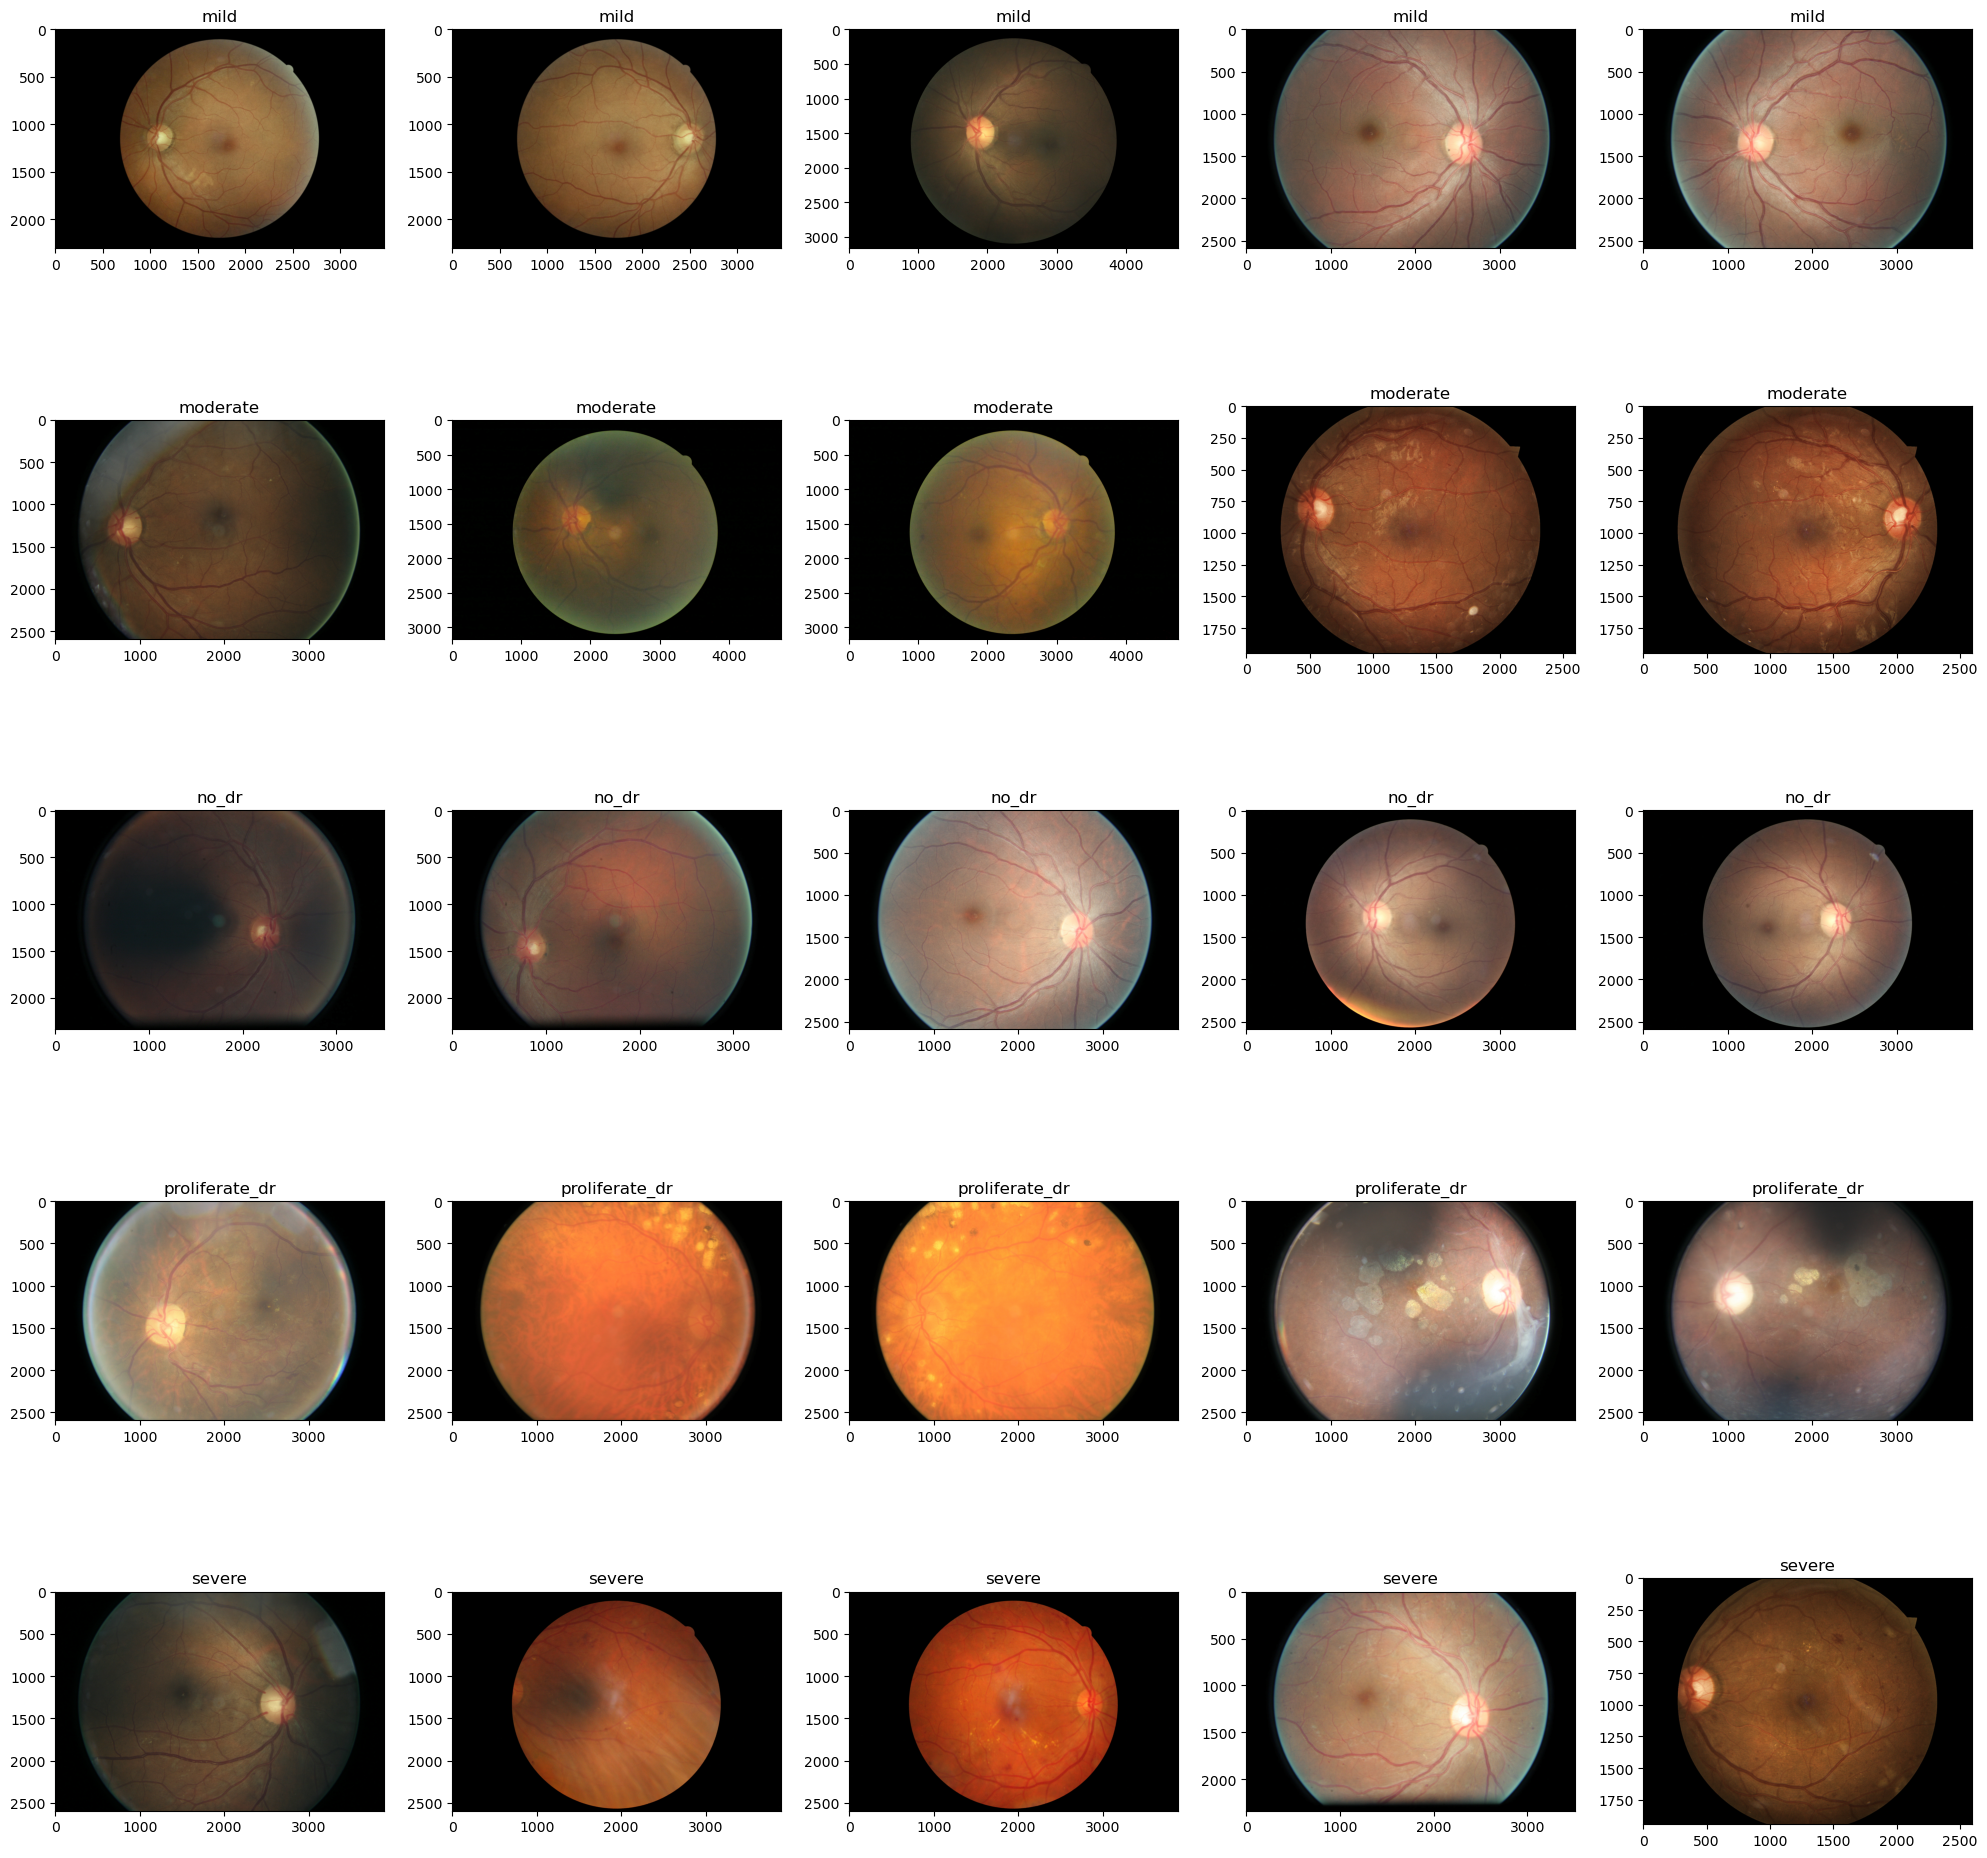

In [7]:
#Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
  #get the list of images in a given class
  train_class = os.listdir(os.path.join('train', i))
  #plot 5 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()



In [8]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in mild = 38 

Number of images in moderate = 32 

Number of images in no_dr = 61 

Number of images in proliferate_dr = 16 

Number of images in severe = 22 



In [9]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

,Image,Labels
0,train\mild\1020_left.jpeg,mild
1,train\mild\1020_right.jpeg,mild
2,train\mild\1027_left.jpeg,mild
3,train\mild\1036_left.jpeg,mild
4,train\mild\1036_right.jpeg,mild
...,...,...
164,train\severe\1639_right.jpeg,severe
165,train\severe\163_left.jpeg,severe
166,train\severe\163_right.jpeg,severe
167,train\severe\1640_left.jpeg,severe


# PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [10]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [11]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 115 validated image filenames belonging to 5 classes.
Found 20 validated image filenames belonging to 5 classes.
Found 34 validated image filenames belonging to 5 classes.
